In [ ]:
import skimage

uint8
(512, 512)
0 255


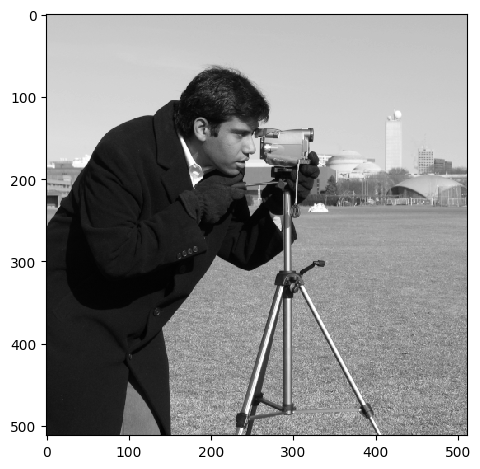

In [ ]:
#Carga de imagen skimage
camera = skimage.data.camera()

#Exploración de la imagen
print(camera.dtype)
print(camera.shape)
print(camera.min(), camera.max())

#Muestreo
skimage.io.imshow(camera)
skimage.io.show()

uint8
(512, 512, 3)
0 255


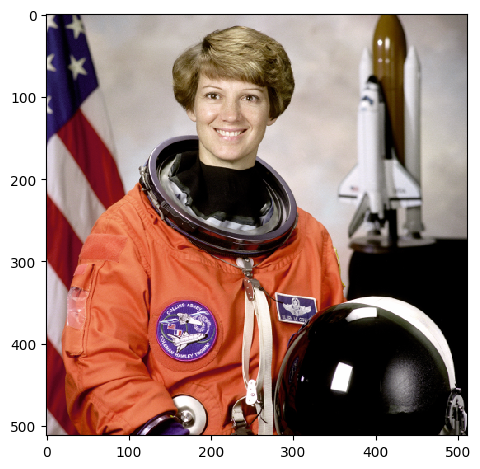

In [ ]:
#Carga de imagen skimage
astronaut = skimage.data.astronaut()

#Exploración de la imagen
print(astronaut.dtype)
print(astronaut.shape)
print(astronaut.min(), astronaut.max())

#Muestreo
skimage.io.imshow(astronaut)
skimage.io.show()

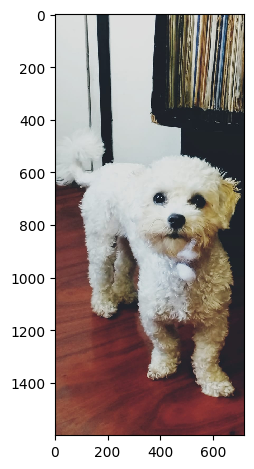

In [ ]:
#Ruta de la imagen
image_path = 'cuky.jpg'

#Carga de imagen
image = skimage.io.imread(image_path)

#Muestreo
skimage.io.imshow(image)
skimage.io.show()

In [ ]:
pip install opencv-python

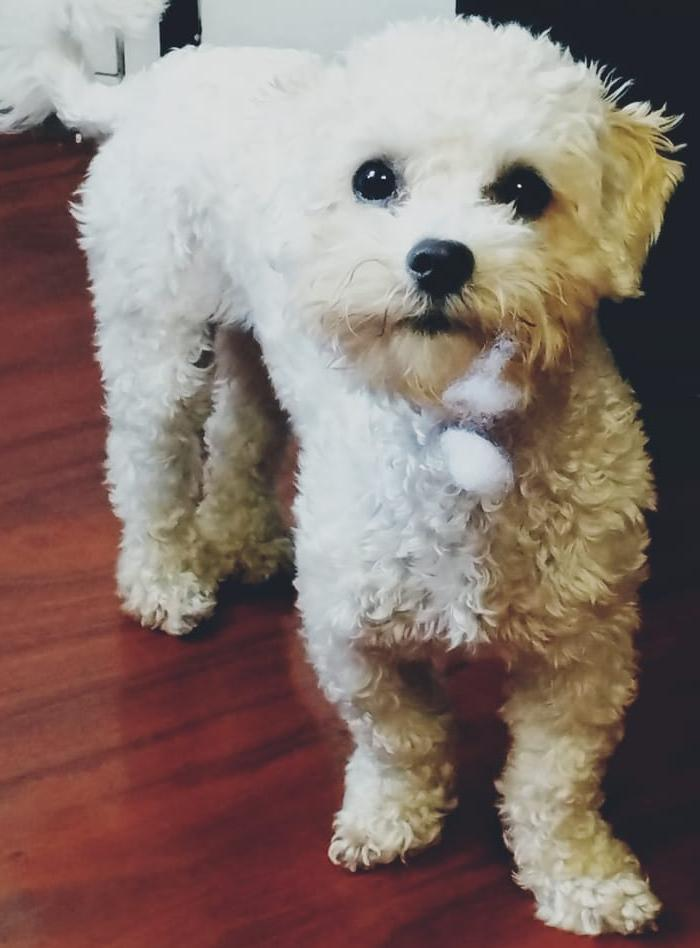

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # Import the cv2_imshow function from google.colab.patches

# carga de imagen desde un archivo
image = cv2.imread('cookie.jpg') # Use cv2.imread to load the image

#Muestreo en ventana
cv2_imshow(image) # Use cv2_imshow to display the image

#Espera a que el usuario presione
cv2.waitKey(0)

#Cierra la ventana
cv2.destroyAllWindows()

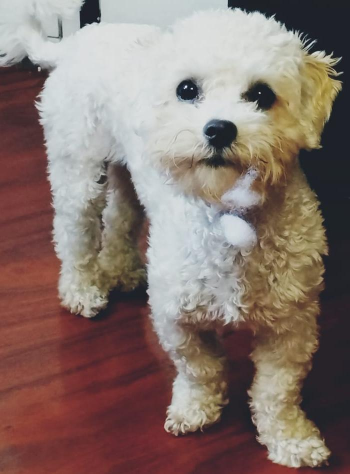

In [ ]:
#Dimensiones
height, width = image.shape[:2]

# Factor de escala (0.5 para reducir al 50%)
factor_escala = 0.5
nuevo_alto = int(height * factor_escala)
nuevo_ancho = int(width * factor_escala)

# Redimensionar la imagen
nuevo_tamano = (nuevo_ancho, nuevo_alto)
imagen = cv2.resize(image, nuevo_tamano, interpolation=cv2.INTER_AREA)

#Muestreo en ventana
cv2_imshow(imagen) # Use cv2_imshow to display the image

#Espera a que el usuario presione
cv2.waitKey(0)

#Cierra la ventana
cv2.destroyAllWindows()

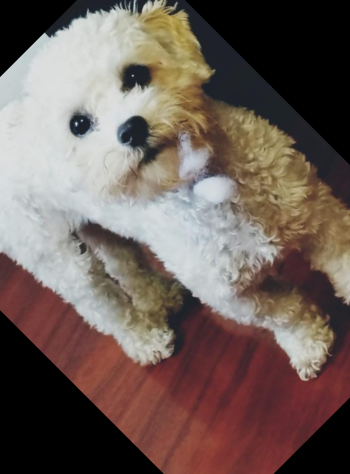

In [ ]:
#Centro de la imagen
center = (int(nuevo_ancho / 2), int(nuevo_alto / 2))

#Matriz de rotación
angle = 45
M = cv2.getRotationMatrix2D(center, angle, 1.0)

#Rotación
rotated = cv2.warpAffine(imagen, M, (nuevo_ancho, nuevo_alto))

#Muestreo en ventana
cv2_imshow(rotated) # Use cv2_imshow to display the image

#Espera a que el usuario presione
cv2.waitKey(0)

#Cierra la ventana
cv2.destroyAllWindows()

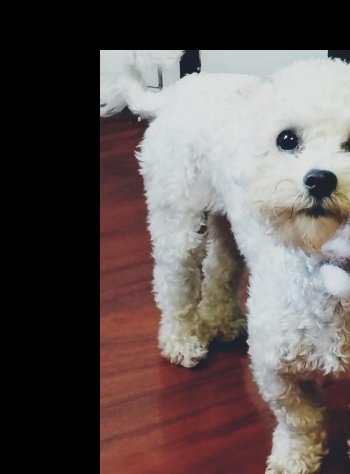

In [ ]:
import numpy as np

#Definir una matriz de traslación
tx, ty = 100, 50
M = np.float32([[1, 0, tx], [0, 1, ty]])

#Aplicar la traslación
translated = cv2.warpAffine(imagen, M, (imagen.shape[1],imagen.shape[0]))

#Muestreo en ventana
cv2_imshow(translated) # Use cv2_imshow to display the image

#Espera a que el usuario presione
cv2.waitKey(0)

#Cierra la ventana
cv2.destroyAllWindows()

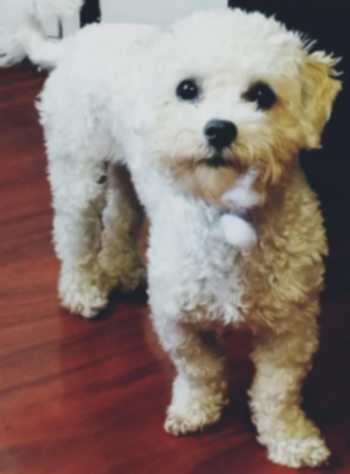

In [ ]:
#Aplicación del filtro Gaussiano para suavizar la imagen
smoothed = cv2.GaussianBlur(imagen, (5, 5), 0)

#Muestreo en ventana
cv2_imshow(smoothed) # Use cv2_imshow to display the image

#Espera a que el usuario presione
cv2.waitKey(0)

#Cierra la ventana
cv2.destroyAllWindows()

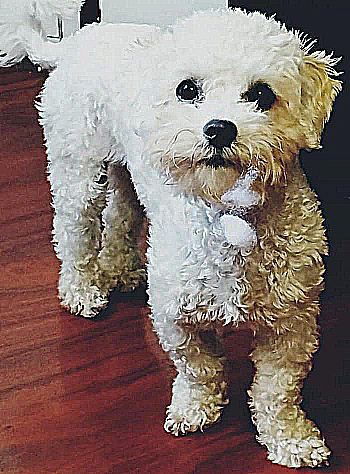

In [ ]:
#Definición del kernel para el filtro del afilado
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])

#Aplicación del filtro de afilado para la realización de detalles
sharpened = cv2.filter2D(imagen, -1, kernel)

#Muestreo en ventana
cv2_imshow(sharpened) # Use cv2_imshow to display the image

#Espera a que el usuario presione
cv2.waitKey(0)

#Cierra la ventana
cv2.destroyAllWindows()

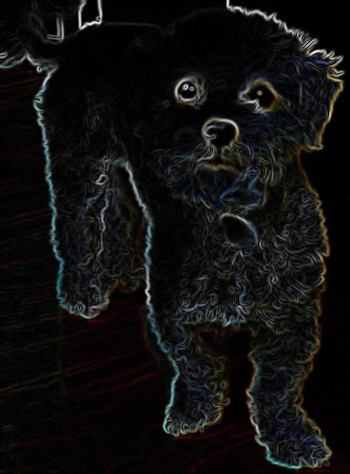

In [ ]:
#Aplicación del operador Sobel para detección de bordes
sobelx = cv2.Sobel(imagen, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(imagen, cv2.CV_64F, 0, 1, ksize=5)

#Combinación de las respuestas en magnitud
edges = cv2.magnitude(sobelx, sobely)

#Normalización de valores para un correcto muestreo de la imagen
edges = cv2.normalize(edges, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#Muestreo en ventana
cv2_imshow(edges) # Use cv2_imshow to display the image

#Espera a que el usuario presione
cv2.waitKey(0)

#Cierra la ventana
cv2.destroyAllWindows()

##Reconocimiento de rostros de gatos##

In [ ]:
faceClassif = cv2.CascadeClassifier('haarcascade_frontalcatface.xml')

In [ ]:
#Carga de la imagen
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

In [ ]:
#Detección de rostros:
faces = faceClassif.detectMultiScale(gray,
                                     scaleFactor=1.1,
                                     minNeighbors=5,
                                     minSize=(30, 30),
                                     maxSize=(200, 200))
print(f'Número de rostros detectados: {len(faces)}')
print(faces)

Número de rostros detectados: 1
[[140  22 162 162]]


In [ ]:
#Rectangulos alrededor de rostros
for (x, y, w, h) in faces:
    cv2.rectangle(imagen, (x, y), (x+w, y+h), (0, 255, 0), 2)

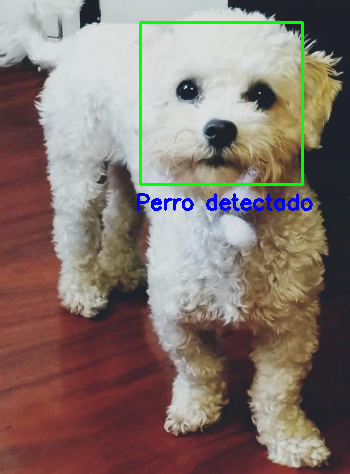

In [ ]:
# Definir el texto y la ubicación para dibujarlo
texto = "Perro detectado"
fuente = cv2.FONT_HERSHEY_SIMPLEX
escala = 0.7
color = (255, 0, 0)  # Azul
grosor = 2

# Obtener el tamaño del texto
(tamaño_texto, _) = cv2.getTextSize(texto, fuente, escala, grosor)

# Definir la ubicación del texto
posicion_texto = (135, imagen.shape[0] - 265)

# Dibujar el texto en la imagen
cv2.putText(imagen, texto, posicion_texto, fuente, escala, color, grosor)

#Imagen con contornos resaltados
cv2_imshow(imagen) # Use cv2_imshow to display the image

#Espera a que el usuario presione
cv2.waitKey(0)

#Cierra la ventana
cv2.destroyAllWindows()